In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("company.csv", encoding='unicode_escape')
data.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice
0,17850.0,536365,25/09/2020,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,8.415
1,17850.0,536365,25/09/2020,71053,WHITE METAL LANTERN,6,11.187
2,17850.0,536365,25/09/2020,84406B,CREAM CUPID HEARTS COAT HANGER,8,9.075
3,17850.0,536365,25/09/2020,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11.187
4,17850.0,536365,25/09/2020,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11.187


In [9]:
def preprocess(original_data):
    data = original_data.dropna()
    data = data.drop_duplicates()
    data.CustomerID = data.CustomerID.astype(int)
    
    df = data[["CustomerID", "InvoiceNo", "InvoiceDate", "Quantity", "UnitPrice"]]
    df.columns = ["CustomerID", "InvoiceNo", "Date", "Quantity", "UnitPrice"]
    
    df["Date"] = pd.to_datetime(df["Date"])
    df = df[df.Quantity > 0]
    
    df["Revenue"] = df["Quantity"] * df["UnitPrice"]
    
    return df.sort_values("Date")

In [10]:
def create_rfm_feature(df):
    max_date = df.Date.max()
    # Recency
    features_recency = df[["CustomerID", "Date"]]\
           .groupby(['CustomerID'])\
           .apply(lambda x: (x["Date"].max() - max_date) / pd.to_timedelta(1, "day"))\
           .to_frame().set_axis(["Recency"], axis=1)
    
    features_frequence = df.drop_duplicates()[["CustomerID", "InvoiceNo", "Date"]]\
            .groupby(by=['CustomerID', 'InvoiceNo']).count()\
            .groupby(by=['CustomerID']).count().set_axis(["Frequence"], axis=1)
    
    # Monetary
    features_monetary = df\
            .groupby(by=['CustomerID']).agg({"Revenue": ["sum", "mean"]})\
            .set_axis(["MonetarySum", "MonetaryMean"], axis=1)

    features = pd.concat([features_recency, features_frequence,features_monetary], axis=1)
    features.head()
    return features

In [11]:
def predict_values(data):
    
    clv_pred = reg_model.predict(data)
    clv_prob = classif_model.predict_proba(data)
    data["CLV"] = clv_pred
    data["ProbBuy"] = clv_prob
    return data

In [12]:
df = preprocess(data)
df

/home/pierjos/MSDA/Projects/CLV-Prediction/clv-env/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


,CustomerID,InvoiceNo,Date,Quantity,UnitPrice,Revenue
13549,12971,537472,2020-01-10,6,8.415,50.490
12451,17519,537420,2020-01-10,36,2.805,100.980
12450,17519,537420,2020-01-10,4,12.375,49.500
12449,13495,537419,2020-01-10,32,8.415,269.280
12448,13495,537419,2020-01-10,12,8.415,100.980
...,...,...,...,...,...,...
435368,18122,577058,2021-12-09,3,6.864,20.592
435369,18122,577058,2021-12-09,2,6.864,13.728
435370,18122,577058,2021-12-09,3,6.864,20.592
435363,18122,577058,2021-12-09,15,2.805,42.075


In [13]:
df = preprocess(data)
features = create_rfm_feature(df)
features

/home/pierjos/MSDA/Projects/CLV-Prediction/clv-env/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


,Recency,Frequence,MonetarySum,MonetaryMean
CustomerID,,,,
12346,-363.0,1,254705.880,254705.880000
12747,0.0,11,13846.833,134.435272
12748,0.0,210,109075.527,24.716865
12749,-30.0,5,13499.904,67.838714
12820,-110.0,4,3109.722,52.707153
...,...,...,...,...
18280,-344.0,1,595.980,59.598000
18281,-188.0,1,266.706,38.100857
18282,-74.0,2,587.565,48.963750


In [8]:
data.isnull().sum() / data.shape[0]

CustomerID     0.269639
InvoiceNo      0.000000
InvoiceDate    0.000000
StockCode      0.000000
Description    0.002935
Quantity       0.000000
UnitPrice      0.000000
dtype: float64

In [9]:
data["CustomerID"].nunique()

3950

In [10]:
data[data["CustomerID"].isnull()]

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice
586,NaN,536414,25/09/2020,22139,NaN,56,0.000
1298,NaN,536544,26/09/2020,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,8.283
1299,NaN,536544,26/09/2020,21774,DECORATIVE CATS BATHROOM BOTTLE,2,8.283
1300,NaN,536544,26/09/2020,21786,POLKADOT RAIN HAT,4,2.805
1301,NaN,536544,26/09/2020,21787,RAIN PONCHO RETROSPOT,2,5.478
...,...,...,...,...,...,...,...
495184,NaN,581498,03/10/2021,85099B,JUMBO BAG RED RETROSPOT,5,13.629
495185,NaN,581498,03/10/2021,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,13.629
495186,NaN,581498,03/10/2021,85150,LADIES & GENTLEMEN METAL SIGN,1,16.368
495187,NaN,581498,03/10/2021,85174,S/4 CACTI CANDLES,1,35.607


In [11]:
data = data.dropna()
data.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice
0,17850.0,536365,25/09/2020,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,8.415
1,17850.0,536365,25/09/2020,71053,WHITE METAL LANTERN,6,11.187
2,17850.0,536365,25/09/2020,84406B,CREAM CUPID HEARTS COAT HANGER,8,9.075
3,17850.0,536365,25/09/2020,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11.187
4,17850.0,536365,25/09/2020,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11.187


In [12]:
data.CustomerID = data.CustomerID.astype(int)
data.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice
0,17850,536365,25/09/2020,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,8.415
1,17850,536365,25/09/2020,71053,WHITE METAL LANTERN,6,11.187
2,17850,536365,25/09/2020,84406B,CREAM CUPID HEARTS COAT HANGER,8,9.075
3,17850,536365,25/09/2020,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11.187
4,17850,536365,25/09/2020,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11.187


In [13]:
data = data.drop_duplicates()
data.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice
0,17850,536365,25/09/2020,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,8.415
1,17850,536365,25/09/2020,71053,WHITE METAL LANTERN,6,11.187
2,17850,536365,25/09/2020,84406B,CREAM CUPID HEARTS COAT HANGER,8,9.075
3,17850,536365,25/09/2020,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11.187
4,17850,536365,25/09/2020,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11.187


In [14]:
# Suppression des enregistrement ou les clients n'ayant pas fait de commande
df = data[["CustomerID", "InvoiceNo", "InvoiceDate", "Quantity", "UnitPrice"]]
df.columns = ["CustomerID", "InvoiceNo", "Date", "Quantity", "UnitPrice"]
df = df[df.Quantity > 0]
df.head()

,CustomerID,InvoiceNo,Date,Quantity,UnitPrice
0,17850.0,536365,25/09/2020,6,8.415
1,17850.0,536365,25/09/2020,6,11.187
2,17850.0,536365,25/09/2020,8,9.075
3,17850.0,536365,25/09/2020,6,11.187
4,17850.0,536365,25/09/2020,6,11.187


In [15]:
# Création de la colonne Revenue
df["Revenue"] = df["Quantity"] * df["UnitPrice"]
df.head()

,CustomerID,InvoiceNo,Date,Quantity,UnitPrice,Revenue
0,17850.0,536365,25/09/2020,6,8.415,50.490
1,17850.0,536365,25/09/2020,6,11.187,67.122
2,17850.0,536365,25/09/2020,8,9.075,72.600
3,17850.0,536365,25/09/2020,6,11.187,67.122
4,17850.0,536365,25/09/2020,6,11.187,67.122


In [16]:
# Convertir la date en datetime
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,CustomerID,InvoiceNo,Date,Quantity,UnitPrice,Revenue
0,17850.0,536365,2020-09-25,6,8.415,50.490
1,17850.0,536365,2020-09-25,6,11.187,67.122
2,17850.0,536365,2020-09-25,8,9.075,72.600
3,17850.0,536365,2020-09-25,6,11.187,67.122
4,17850.0,536365,2020-09-25,6,11.187,67.122


# Analyse de données et responses aux questions

### 1. Quels clients apportent plus?

In [93]:
df.groupby('CustomerID').agg({'Quantity': 'sum', 'Revenue': 'sum'})\
            .sort_values(by=["Revenue"], ascending=False).head(10)

,Quantity,Revenue
CustomerID,,
18102,64124,856869.090
17450,69973,641489.607
16446,80997,555959.250
17511,64549,300505.854
16029,40108,266807.772
12346,74215,254705.880
16684,50255,219956.748
14096,16352,215043.807
13694,63312,214630.746


In [94]:
df.groupby('CustomerID').agg({'Quantity': 'sum', 'Revenue': 'sum'})\
            .sort_values(by=["Quantity"], ascending=False).head(10)

,Quantity,Revenue
CustomerID,,
16446,80997,555959.250
12346,74215,254705.880
17450,69973,641489.607
17511,64549,300505.854
18102,64124,856869.090
13694,63312,214630.746
14298,58343,170040.090
16684,50255,219956.748
16029,40108,266807.772


### 2. Temps entre deux commandes par clients?

In [95]:
df2 = df.copy()
df2["TimeBetweenTwoOrders"] = df.sort_values('Date').groupby("CustomerID")["Date"].diff().dropna()
df2

,CustomerID,Date,Quantity,UnitPrice,Revenue,TimeBetweenTwoOrders
0,17850,2020-09-25,6,8.415,50.490,NaT
1,17850,2020-09-25,6,11.187,67.122,0 days
2,17850,2020-09-25,8,9.075,72.600,0 days
3,17850,2020-09-25,6,11.187,67.122,0 days
4,17850,2020-09-25,6,11.187,67.122,0 days
...,...,...,...,...,...,...
495473,15804,2021-03-10,12,6.435,77.220,0 days
495474,13113,2021-04-10,8,9.735,77.880,0 days
495475,13113,2021-04-10,24,4.125,99.000,0 days
495476,13113,2021-04-10,24,29.535,708.840,2 days


In [96]:
waiting_time = df2.groupby('CustomerID').agg(
    {
        'TimeBetweenTwoOrders': ['min', 'mean', 'max'],
    }
).dropna()
waiting_time

TimeBetweenTwoOrders                                    
                            min                       mean      max
CustomerID                                                         
12747                    0 days  5 days 01:38:49.411764705 133 days
12748                    0 days  0 days 03:48:08.485947416  92 days
12749                    0 days  0 days 23:01:49.090909090 126 days
12820                    0 days  4 days 21:06:12.413793103 192 days
12821                    0 days            0 days 00:00:00   0 days
...                         ...                        ...      ...
18280                    0 days            0 days 00:00:00   0 days
18281                    0 days            0 days 00:00:00   0 days
18282                    0 days 10 days 17:27:16.363636363 118 days
18283                    0 days            0 days 20:56:00 312 days
18287                    0 days  2 days 07:18:15.652173913  84 days

[3850 rows x 3 columns]

In [97]:
waiting_time.describe()

TimeBetweenTwoOrders                              \
                              min                        mean   
count                        3850                        3850   
mean    0 days 17:14:33.350649350   4 days 14:42:04.001432981   
std    12 days 14:20:00.847263865  15 days 22:47:16.675377091   
min               0 days 00:00:00             0 days 00:00:00   
25%               0 days 00:00:00             0 days 00:00:00   
50%               0 days 00:00:00   1 days 11:44:26.356291934   
75%               0 days 00:00:00   4 days 03:11:42.650602409   
max             344 days 00:00:00           344 days 00:00:00   

                                    
                               max  
count                         3850  
mean   102 days 02:52:03.116883117  
std    110 days 14:01:03.161343560  
min                0 days 00:00:00  
25%                0 days 00:00:00  
50%               80 days 00:00:00  
75%              164 days 00:00:00  
max              630 days 00:00:00

Si l'on s'interresse au temps maximal d'attente entre deux commandes, alors en moyenne il faut attendre 102 jours pour qu'un client puisse faire une autre commande alors qu'il faut 80 jours en mediane.

### 3. Evolution de revenue et quantité

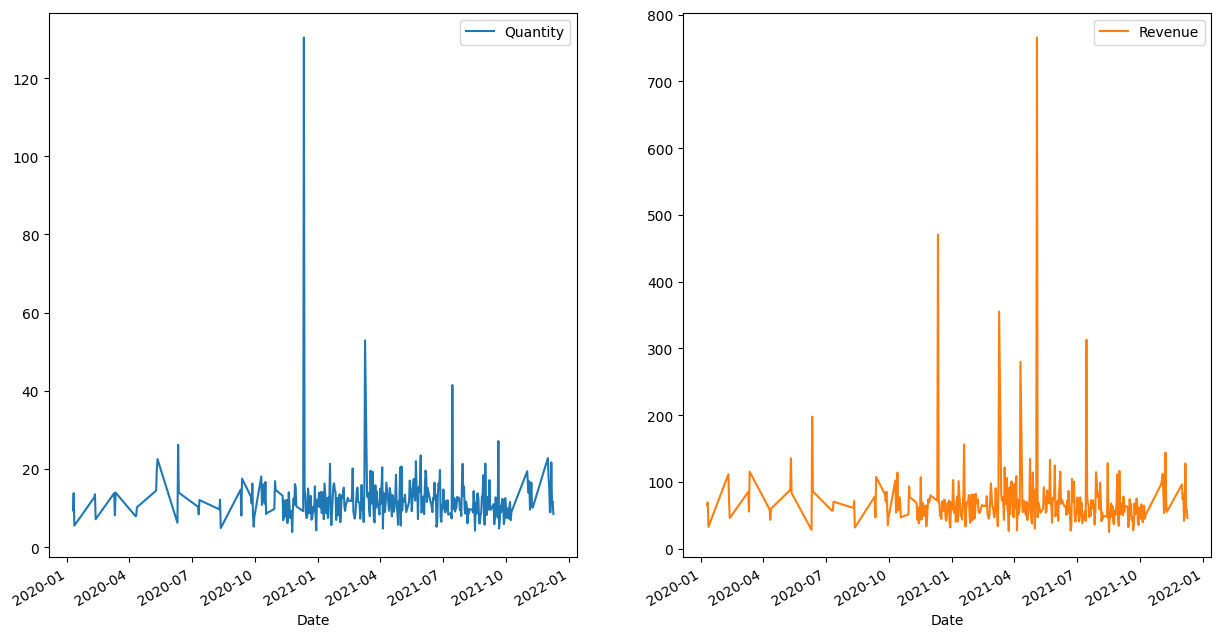

In [98]:
df.sort_values('Date').groupby(["Date"]).agg({"Quantity": 'mean', 'Revenue': 'mean'})\
    .plot(subplots=True, layout=(1,2), figsize = (15, 8))
plt.show()

# Modélisation

In [21]:
df.groupby('CustomerID').head()

,CustomerID,InvoiceNo,Date,Quantity,UnitPrice,Revenue
0,17850,536365,2020-09-25,6,8.415,50.490
1,17850,536365,2020-09-25,6,11.187,67.122
2,17850,536365,2020-09-25,8,9.075,72.600
3,17850,536365,2020-09-25,6,11.187,67.122
4,17850,536365,2020-09-25,6,11.187,67.122
...,...,...,...,...,...,...
492634,14569,581416,2021-03-10,1,5.445,5.445
492635,14569,581416,2021-03-10,1,49.335,49.335
492636,14569,581416,2021-03-10,16,11.187,178.992
492637,14569,581416,2021-03-10,48,8.415,403.920


### Création des features

In [17]:
cutoff = 80
cutoff_date = df.Date.max() -  pd.to_timedelta(cutoff, unit='d')
cutoff_date

Timestamp('2021-09-20 00:00:00')

In [19]:
df_label = df[df.Date > cutoff_date]

targets = df_label.groupby(by="CustomerID").agg({"Revenue": "mean"}).assign(prob_80_days = 1)
targets.columns = ["Monetary_"+str(cutoff)+"_days", "prob_"+str(cutoff)+"_days"]
targets.head()

,Monetary_80_days,prob_80_days
CustomerID,,
12747.0,93.819000,1
12748.0,23.291799,1
12749.0,62.079507,1
12827.0,73.557000,1
12828.0,69.498000,1


In [20]:
df_features = df[df.Date <= cutoff_date]

# Recency
max_date = df_features.Date.max()
features_recency = df_features[["CustomerID", "Date"]]\
           .groupby(['CustomerID'])\
           .apply(lambda x: (x["Date"].max() - max_date) / pd.to_timedelta(1, "day"))\
           .to_frame().set_axis(["Recency"], axis=1)

# Frequence
features_frequence = df_features.drop_duplicates()[["CustomerID", "InvoiceNo", "Date"]]\
        .groupby(by=['CustomerID', "InvoiceNo"]).count()\
        .groupby(by=['CustomerID']).count().set_axis(["Frequence"], axis=1)

# Monetary
features_monetary = df_features\
        .groupby(by=['CustomerID']).agg({"Revenue": ["sum", "mean"]})\
        .set_axis(["MonetarySum", "MonetaryMean"], axis=1)

features = pd.concat([features_recency, features_frequence,features_monetary], axis=1)
features.head()

,Recency,Frequence,MonetarySum,MonetaryMean
CustomerID,,,,
12346.0,-283.0,1,254705.880,254705.880000
12747.0,-53.0,10,12814.824,139.291565
12748.0,0.0,185,90079.572,24.438300
12749.0,-116.0,3,9092.259,71.033273
12820.0,-30.0,4,3109.722,52.707153


In [21]:
def create_rfm_feature(df):
    max_date = df.Date.max()

    features = df.groupby(['CustomerID']).agg(
        {
            'Date': 'max',
        }
    )
    features["Date"] = (features["Date"] - df.Date.max()).dt.days
    features.columns = ["Recency"]
    
    # Frequence et Monetary
    features_ = df.groupby(['CustomerID', 'Date']).agg(
        {
            'Quantity': 'count',
            'Revenue': 'sum',
        }
    ).groupby('CustomerID').agg(
        {
            'Quantity': 'count',
            'Revenue': 'sum',
    })
    features_.columns = ["Frequence", "Monetary"]
    features = pd.merge(features, features_, right_index=True, left_index=True)
    return features

In [23]:
final_df = pd.merge(features,targets, how="left", right_index=True, left_index=True).fillna(0)
final_df

,Recency,Frequence,MonetarySum,MonetaryMean,Monetary_80_days,prob_80_days
CustomerID,,,,,,
12346.0,-283.0,1,254705.880,254705.880000,0.000000,0.0
12747.0,-53.0,10,12814.824,139.291565,93.819000,1.0
12748.0,0.0,185,90079.572,24.438300,23.291799,1.0
12749.0,-116.0,3,9092.259,71.033273,62.079507,1.0
12820.0,-30.0,4,3109.722,52.707153,0.000000,0.0
...,...,...,...,...,...,...
18280.0,-264.0,1,595.980,59.598000,0.000000,0.0
18281.0,-108.0,1,266.706,38.100857,0.000000,0.0
18282.0,-112.0,1,330.693,47.241857,51.374400,1.0


In [24]:
final_df.prob_80_days.value_counts(normalize=True)

0.0    0.698149
1.0    0.301851
Name: prob_80_days, dtype: float64

In [25]:
final_df.describe()

,Recency,Frequence,MonetarySum,MonetaryMean,Monetary_80_days,prob_80_days
count,3727.000000,3727.000000,3727.000000,3727.000000,3727.000000,3727.000000
mean,-107.068420,3.885162,5633.890348,342.897524,39.257037,0.301851
std,112.178642,6.483077,21853.430269,10048.579195,299.711491,0.459123
min,-619.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,-165.000000,1.000000,954.673500,37.604471,0.000000,0.000000
50%,-63.000000,2.000000,2006.730000,57.003692,0.000000,0.000000
75%,-24.000000,4.000000,4793.167500,80.291730,24.428643,1.000000
max,0.000000,185.000000,687545.034000,555949.680000,14213.694000,1.000000


In [43]:
final_df.corr()

,Recency,Frequence,MonetarySum,MonetaryMean,Monetary_80_days,prob_80_days
Recency,1.000000,0.261108,0.115793,-0.024948,0.010685,0.215588
Frequence,0.261108,1.000000,0.492472,-0.008154,0.110464,0.316593
MonetarySum,0.115793,0.492472,1.000000,0.466045,0.225987,0.177765
MonetaryMean,-0.024948,-0.008154,0.466045,1.000000,0.019513,0.017493
Monetary_80_days,0.010685,0.110464,0.225987,0.019513,1.000000,0.199425
prob_80_days,0.215588,0.316593,0.177765,0.017493,0.199425,1.000000


In [45]:
final_df.to_csv("final_data.csv")

### Prediction du revenu dans les 80 jours

In [31]:
from sklearn.model_selection import train_test_split, KFold

#### Autosklearn

In [32]:
X = final_df.drop(["Monetary_80_days", "prob_80_days"], axis=1)
y = final_df["Monetary_80_days"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [ ]:
data_train, data_test = train_test_split(final_df, test_size=0.3, random_state=9)

In [34]:
from pycaret.regression import RegressionExperiment
s = RegressionExperiment()
s.setup(data, target = 'charges', session_id = 123)

best = s.compare_models()

ModuleNotFoundError: No module named 'pycaret'